## CVSS 4.0 Performance review
*add description*

At the beginning we will compare base scores of 3.1 and 4.0 and plot it as a graph TODO: do we want to add anything else general?

#### Comparison of the CVSS 3.1 and CVSS 4.0 score

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as rq
import cvss
from vector_converter import score_converter

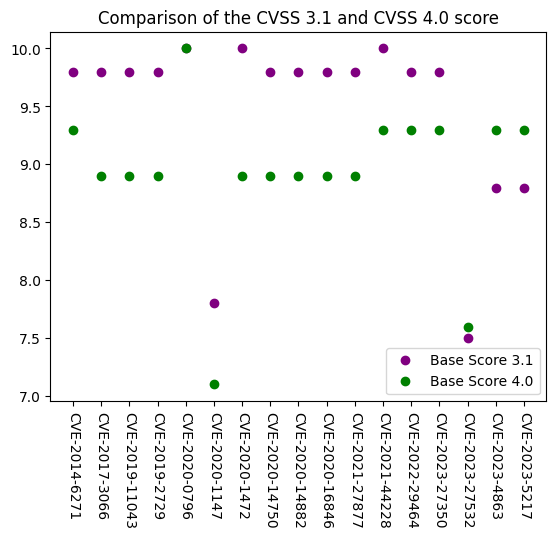

In [180]:

df = pd.read_excel("EPSSprep.xlsx")
plt.plot(df['Base Score 3.1'], 'o', label="Base Score 3.1", color="purple")
plt.plot(df['Base Score 4.0'], 'o', label="Base Score 4.0", color="green")
plt.xticks(df.index,df['CVE'], rotation=-90)
plt.legend()
plt.title('Comparison of the CVSS 3.1 and CVSS 4.0 score')
plt.show()
tot_amount = len(df)

#read in the vectors from EPSSprep file
#cut the 4.0 vector so it has only base scores
# plot it using two diff functions

#### How does the CVSS 3.1 base score relate to CVSS 4.0 base score?

3


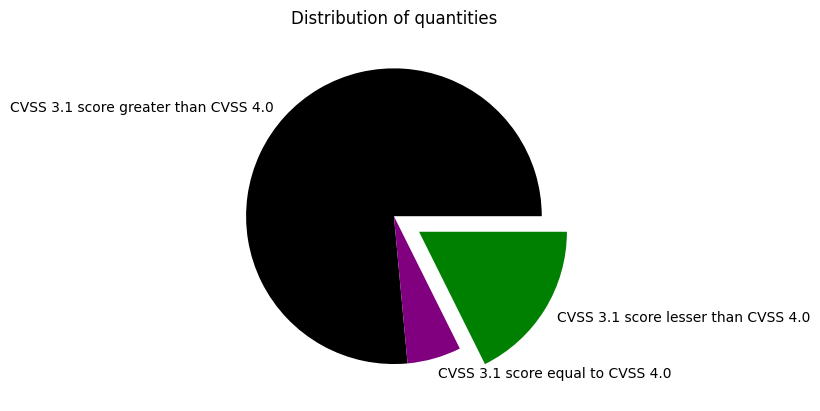

In [181]:
x = (df['Base Score 3.1'] > df['Base Score 4.0']).sum() # 3.1 score is greater than 4.0
y = (df['Base Score 3.1'] == df['Base Score 4.0']).sum() # 3.1 score is equal to 4.0
z = tot_amount - x - y # 4.0 score is greater than 3.1
print(z)
explode = [0,0,0.2]
plt.pie([x,y,z],colors=["black","purple","green"],labels=["CVSS 3.1 score greater than CVSS 4.0", "CVSS 3.1 score equal to CVSS 4.0", "CVSS 3.1 score lesser than CVSS 4.0"], explode=explode)
plt.title("Distribution of quantities")
plt.show()

#### EPSS Scores

What is epss

CVE-2014-6271,CVE-2017-3066,CVE-2019-11043,CVE-2019-2729,CVE-2020-0796,CVE-2020-1147,CVE-2020-1472,CVE-2020-14750,CVE-2020-14882,CVE-2020-16846,CVE-2021-27877,CVE-2021-44228,CVE-2022-29464,CVE-2023-27350,CVE-2023-27532,CVE-2023-4863,CVE-2023-5217
[0.60914, 0.02851, 0.9698, 0.97438, 0.97557, 0.7621, 0.97343, 0.97472, 0.97539, 0.46653, 0.86968, 0.97478, 0.96836, 0.97472, 0.90956]


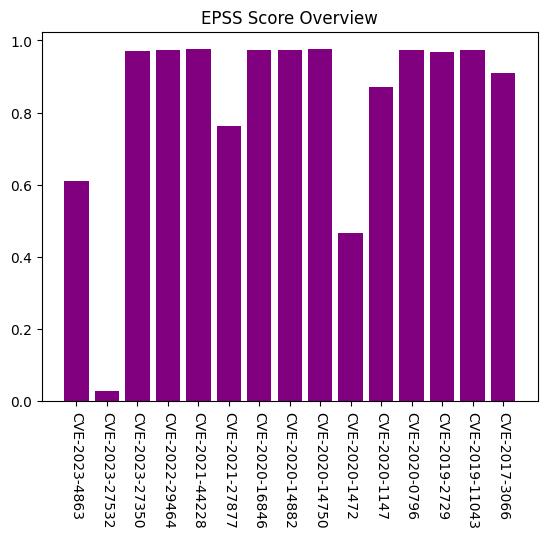

In [182]:
# EPSS Score Overview
c = list(df['CVE'])
cs = ','.join(c)
print(cs)
r = rq.get(f"https://api.first.org/data/v1/epss?cve=`${cs}`")
arr = []
name_arr = []
for x in r.json()['data']:
    name_arr.append((x['cve']))
    arr.append(float(x['epss']))
print(arr)

plt.bar(np.arange(0,len(arr)),height=arr, color = 'purple')
plt.xticks(np.arange(0,len(arr)), name_arr, rotation=-90)
plt.title('EPSS Score Overview')
plt.show()

#### Does high CVSS score correlate to a high EPSS score?

In [183]:
# if it has high cvss score is it likely to get exploited
# CVSS and EPSS correlation  

#df['epss'] = arr
j = 0
for i in df['CVE']:
    if i not in name_arr:
        df = df.drop(j)
        
    j+=1

df['EPSS'] = arr # add a new column
corr = df['Base Score 4.0'].corr(df['EPSS'])
corr3 = df['Base Score 3.1'].corr(df['EPSS'])
print(corr)
print(corr3)

-0.05003888464445837
-0.22971610843193027


Conclusion from the correlation :  it seems the high CVSS score is not correlated to a high EPSS score.

Conclusion here: TODO: fill it

Now we move onto individual cases: TODO: fill in an introduction about the cases :) \
Cases assignment:\
1-5 Wojtek\
6-9 Dino\
10-13 Natalia\
14-17 Karolina

#### CVE-XXXX-XXXX what should the study case include:
x The description of the vulnerability [what is it, when was it discovered, what did it affect, any known attacks]\
x Base Score 3.1 vs 4.0 again on a bar graph [matplotlib]\
x EPSS score\
x Talk about the base metric changes, the additional metrics how we got them etc\
x Include maybe some useful links if you see them fit\
TODO: Ideas




### CVE-2020-16846  

##### Description:
As nvd.nist.gov states CVE-2020-16846 is an issue that was discovered in SaltStack Salt through 3002. \
Sending crafted web requests to the Salt API, with the SSH client enabled, can result in shell injections.

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA:H/SC:N/SI:N/SA:N
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


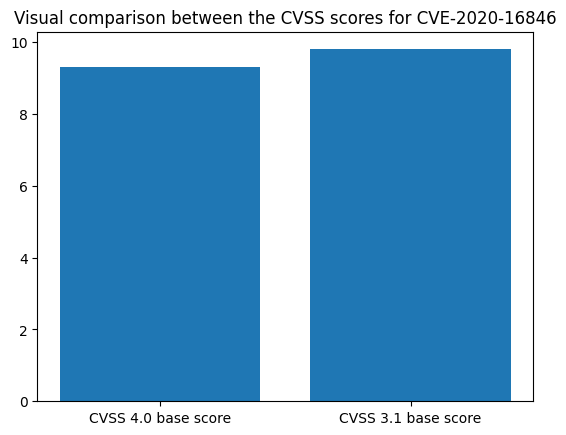

In [184]:
vector_name = 'CVE-2020-16846'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = cvss.CVSS4(new_vector).base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input)
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

CVE-2021-27877

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA:H/SC:N/SI:N/SA:N
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


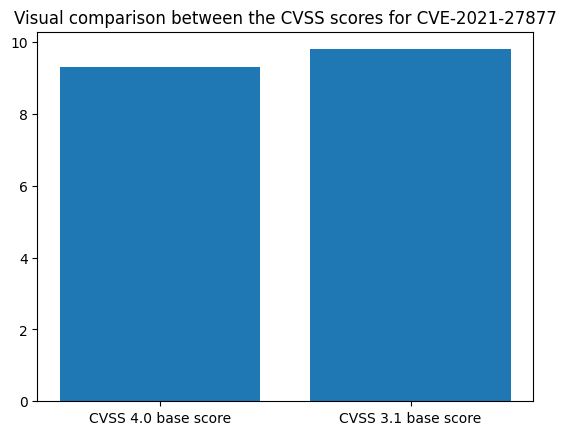

In [185]:
vector_name = 'CVE-2021-27877'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = cvss.CVSS4(new_vector).base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input)
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

CVE-2021-44228

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:C/C:H/I:H/A:H
This is the new calculated vector: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA:H/SC:N/SI:N/SA:N
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 10.0
The new base score: 9.3


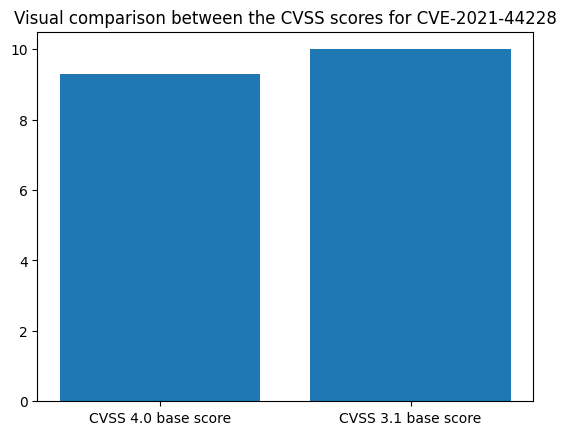

In [186]:
vector_name = 'CVE-2021-44228'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = cvss.CVSS4(new_vector).base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input)
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

CVE-2022-29464

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA:H/SC:N/SI:N/SA:N
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


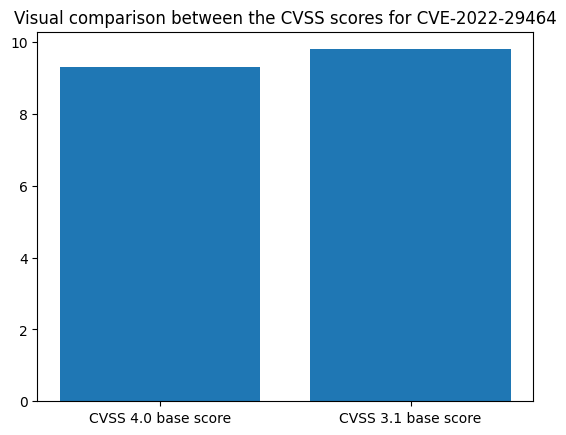

In [187]:
vector_name = 'CVE-2022-29464'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = cvss.CVSS4(new_vector).base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input)
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### Conclusion